<a href="https://colab.research.google.com/github/victor11112/Global-Disaster-Dashboard/blob/main/Raw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 📤 Upload file from local machine
from google.colab import files
uploaded = files.upload()

# 📄 Load the CSV into a DataFrame
import pandas as pd

# Replace this with your uploaded filename
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename, encoding='latin1')

# Preview the data
df.head()


Saving Disaster Group.csv to Disaster Group.csv


,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1999-9388-DJI,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,DJI,...,NaN,NaN,NaN,NaN,NaN,NaN,58.111474,"[{""adm1_code"":1093,""adm1_name"":""Ali Sabieh""},{...",01/03/2006,25/09/2023
1,1999-9388-SDN,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,SDN,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":2757,""adm1_name"":""Northern Darfu...",08/03/2006,25/09/2023
2,1999-9388-SOM,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,SOM,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":2691,""adm1_name"":""Bay""},{""adm1_c...",08/03/2006,25/09/2023
3,2000-0001-AGO,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,AGO,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,NaN,27/10/2004,25/09/2023
4,2000-0002-AGO,No,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,AGO,...,NaN,NaN,NaN,NaN,10000.0,17695.0,56.514291,"[{""adm2_code"":4214,""adm2_name"":""Baia Farta""},{...",03/02/2005,25/09/2023


In [ ]:
# 📦 Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
warnings.filterwarnings('ignore')

# 📅 Convert Start/End parts into full datetime
date_parts = ['Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day']
df[date_parts] = df[date_parts].fillna(1).astype(int)  # fill NaNs with 1

df['Start_Date'] = pd.to_datetime(df[['Start Year', 'Start Month', 'Start Day']].rename(columns={'Start Year': 'year', 'Start Month': 'month', 'Start Day': 'day'}), errors='coerce')
df['End_Date'] = pd.to_datetime(df[['End Year', 'End Month', 'End Day']].rename(columns={'End Year': 'year', 'End Month': 'month', 'End Day': 'day'}), errors='coerce')

# ⏱️ Disaster duration in days
df['Disaster_Duration'] = (df['End_Date'] - df['Start_Date']).dt.days
df['Disaster_Duration'] = df['Disaster_Duration'].apply(lambda x: x if x >= 0 else np.nan)

In [ ]:
# Normalize cost fields by stripping $ and commas
cost_cols = [
    "Total Damage ('000 US$)",
    "Total Damage, Adjusted ('000 US$)",
    "Reconstruction Costs ('000 US$)",
    "Reconstruction Costs, Adjusted ('000 US$)",
    "Insured Damage ('000 US$)",
    "Insured Damage, Adjusted ('000 US$)",
    "Aid Contribution ('000 US$)"
]

for col in cost_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(r'[^\d.]', '', regex=True), errors='coerce')


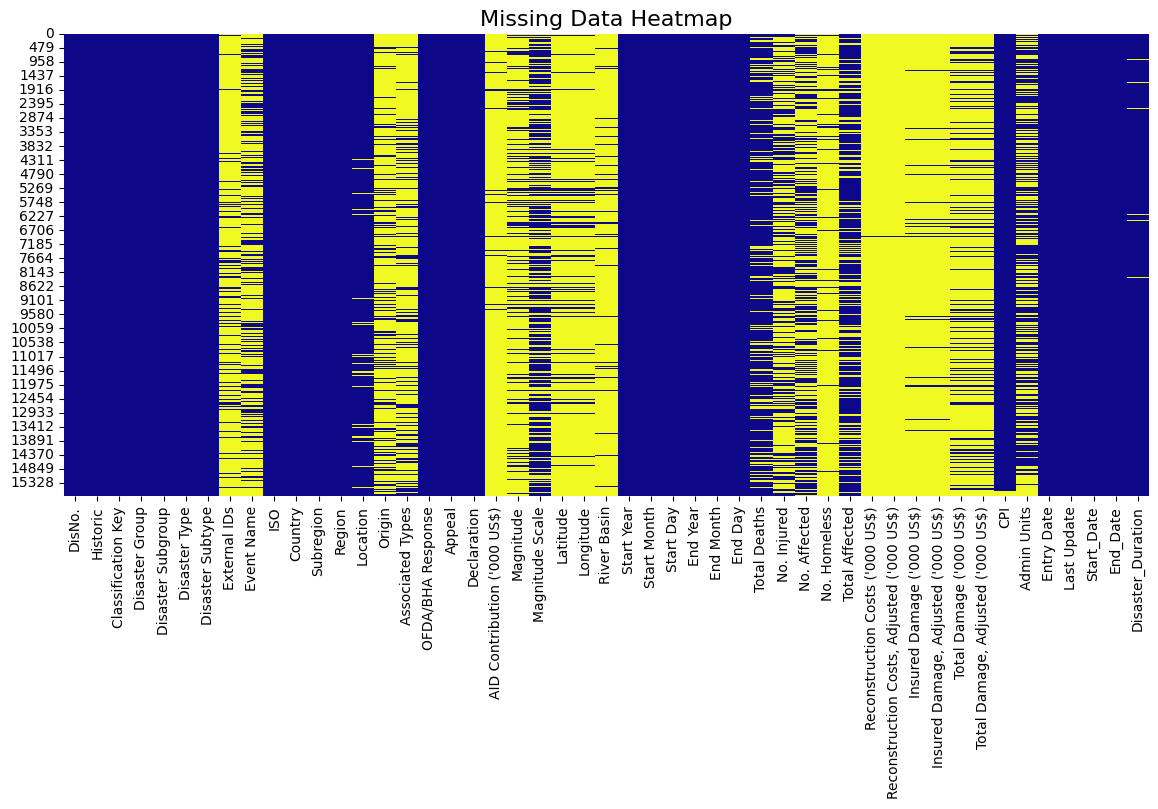

In [ ]:
# 🔥 Visualize missing data
plt.figure(figsize=(14, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='plasma')
plt.title("Missing Data Heatmap", fontsize=16)
plt.show()


In [ ]:
# Admin Units field is JSON-like; parse to extract region names
def extract_admin_names(raw):
    try:
        fixed = raw.replace("'", "\"")
        parsed = json.loads(fixed)
        names = [d.get('adm1_name') or d.get('adm2_name') for d in parsed]
        return names
    except:
        return np.nan

df['Admin_Names'] = df['Admin Units'].apply(extract_admin_names)


In [ ]:
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')


In [ ]:
print(df.columns.tolist())


['DisNo.', 'Historic', 'Classification Key', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region', 'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal', 'Declaration', "AID Contribution ('000 US$)", 'Magnitude', 'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day', 'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless', 'Total Affected', "Reconstruction Costs ('000 US$)", "Reconstruction Costs, Adjusted ('000 US$)", "Insured Damage ('000 US$)", "Insured Damage, Adjusted ('000 US$)", "Total Damage ('000 US$)", "Total Damage, Adjusted ('000 US$)", 'CPI', 'Admin Units', 'Entry Date', 'Last Update', 'Start_Date', 'End_Date', 'Disaster_Duration', 'Admin_Names', 'Has_Missing_Data']


In [ ]:
# ✅ Check if all preview columns exist before displaying
expected_cols = [
    'Start_Date', 'End_Date', 'Disaster_Duration',
    'Was_Aid_Provided', 'Damage_Per_Death',
    'Has_Missing_Data', 'Admin_Names'
]

available_cols = [col for col in expected_cols if col in df.columns]

# Preview available cleaned data safely
df[available_cols].head()


,Start_Date,End_Date,Disaster_Duration,Has_Missing_Data,Admin_Names
0,2001-06-01,2001-01-01,NaN,1,"[Ali Sabieh, Dikhil, Djibouti, Obock, Tadjourah]"
1,2000-01-01,2001-01-01,366.0,1,"[Northern Darfur, Red Sea, Northern Kordofan]"
2,2000-01-01,2001-01-01,366.0,1,"[Bay, Hiraan, Ceel Barde, Rab Dhuure, Tayeeglo..."
3,2000-01-26,2000-01-26,0.0,1,NaN
4,2000-01-08,2000-01-15,7.0,1,"[Baia Farta, Cambambe]"


In [ ]:
import json

def extract_admin_names(raw):
    try:
        fixed = raw.replace("'", "\"")
        parsed = json.loads(fixed)
        names = [d.get('adm1_name') or d.get('adm2_name') for d in parsed]
        return names
    except:
        return np.nan

df['Admin_Names'] = df['Admin Units'].apply(extract_admin_names)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style='whitegrid')


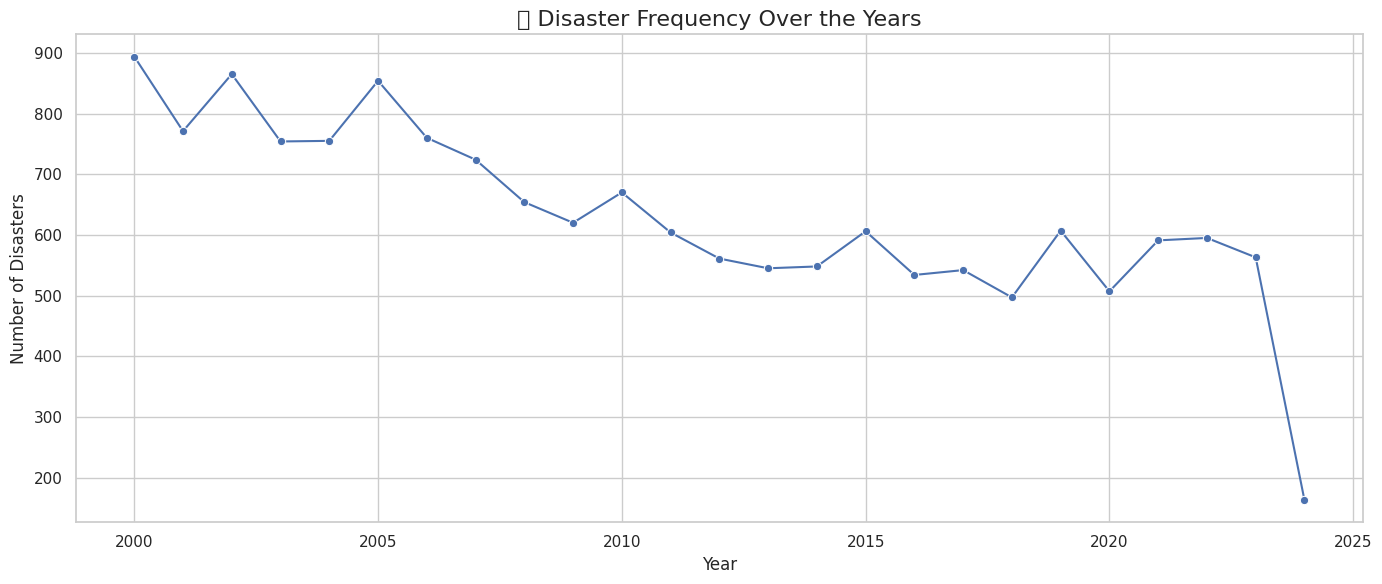

In [ ]:
# Count of disasters per year
df_yearly = df['Start_Date'].dt.year.value_counts().sort_index()

plt.figure(figsize=(14,6))
sns.lineplot(x=df_yearly.index, y=df_yearly.values, marker='o')
plt.title('📈 Disaster Frequency Over the Years', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.grid(True)
plt.tight_layout()
plt.show()


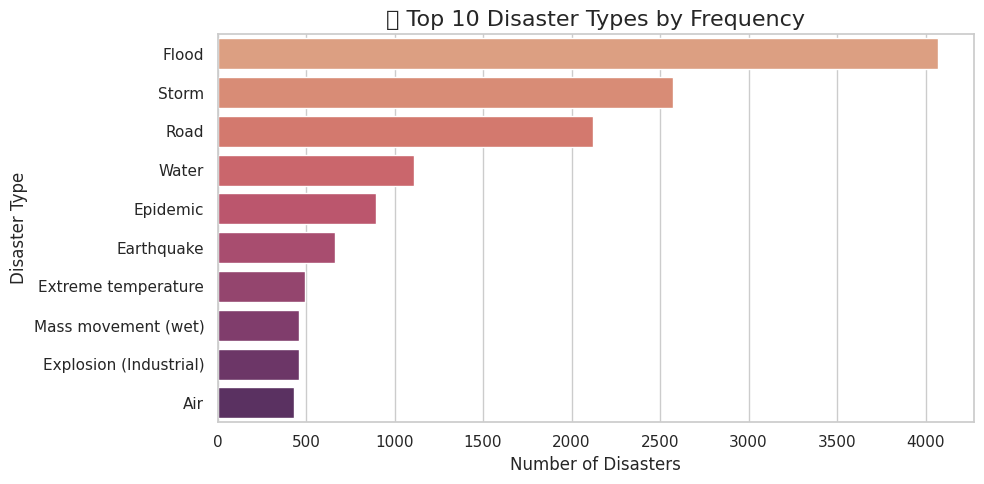

In [ ]:
# Count by disaster type
top_types = df['Disaster Type'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_types.values, y=top_types.index, palette='flare')
plt.title('🔥 Top 10 Disaster Types by Frequency', fontsize=16)
plt.xlabel('Number of Disasters')
plt.ylabel('Disaster Type')
plt.tight_layout()
plt.show()


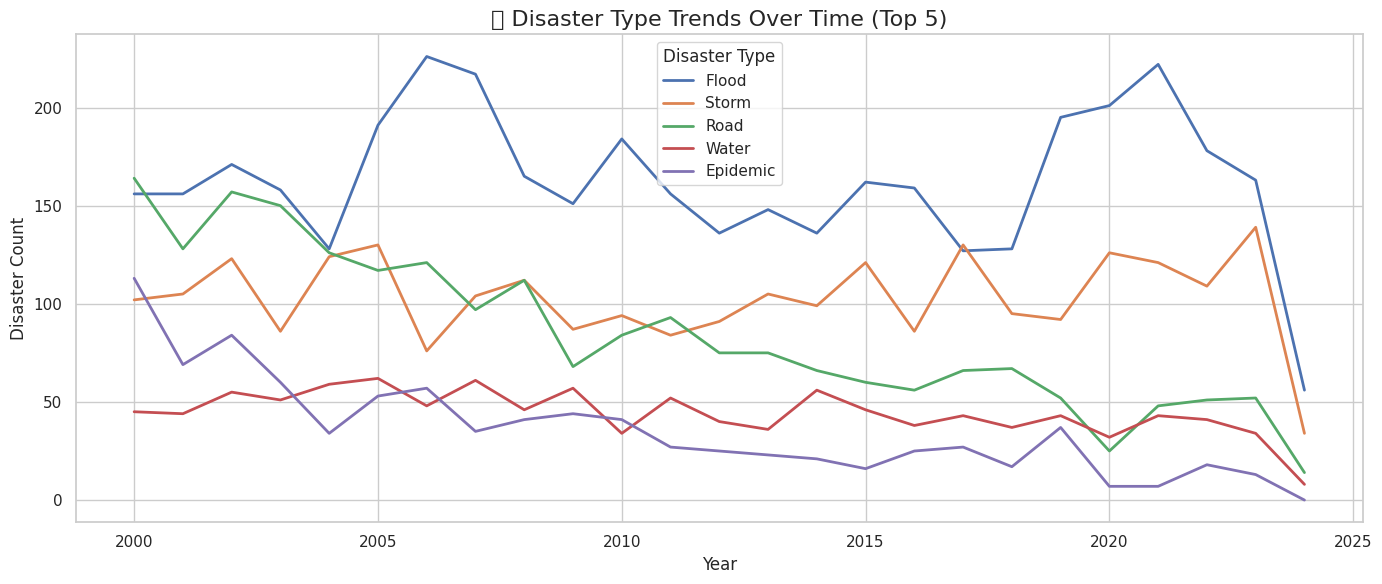

In [ ]:
# Create a Year column
df['Start_Year'] = df['Start_Date'].dt.year

# Group by Year and Disaster Type
df_type_trend = df.groupby(['Start_Year', 'Disaster Type']).size().reset_index(name='Count')

# Pivot for plotting
pivot = df_type_trend.pivot(index='Start_Year', columns='Disaster Type', values='Count').fillna(0)

# Plot trend of top 5 types only
top5 = df['Disaster Type'].value_counts().head(5).index
pivot[top5].plot(figsize=(14,6), linewidth=2)

plt.title('📊 Disaster Type Trends Over Time (Top 5)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Disaster Count')
plt.legend(title='Disaster Type')
plt.grid(True)
plt.tight_layout()
plt.show()


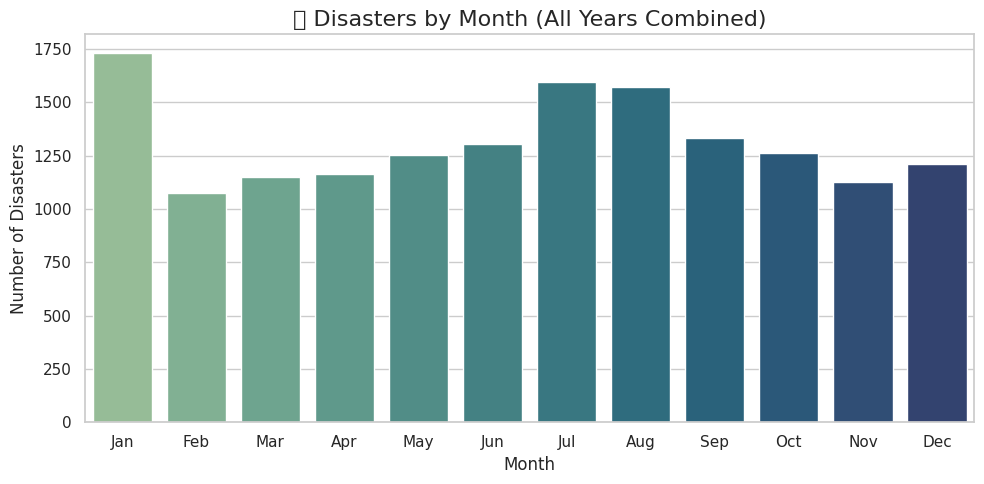

In [ ]:
# Add a Month column
df['Start_Month'] = df['Start_Date'].dt.month

# Group by month
monthly_counts = df['Start_Month'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='crest')
plt.title('📆 Disasters by Month (All Years Combined)', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Number of Disasters')
plt.xticks(ticks=range(0,12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.tight_layout()
plt.show()


In [ ]:
df['Country'].unique()[:5]


array(['Djibouti', 'Sudan', 'Somalia', 'Angola', 'Bangladesh'],
      dtype=object)

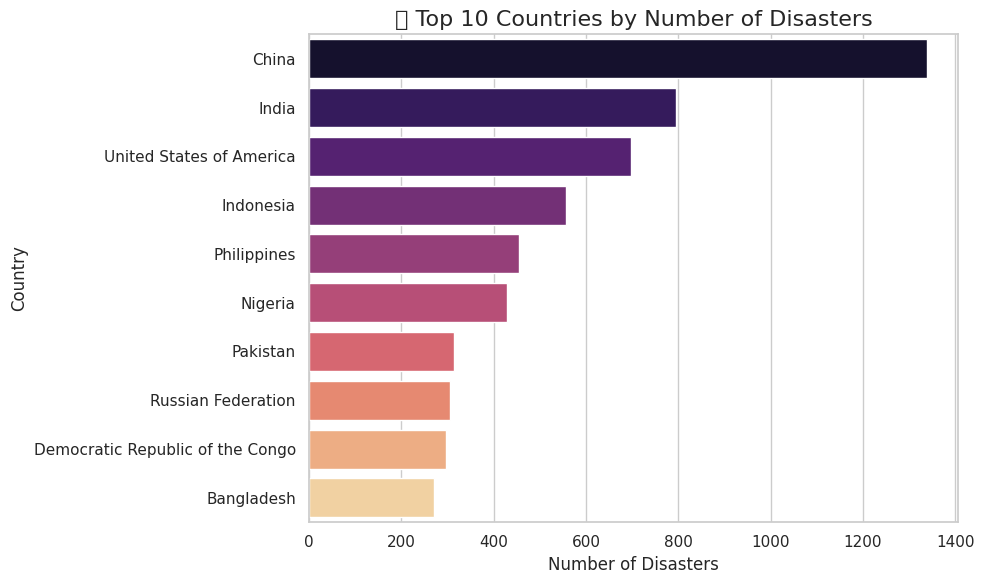

In [ ]:
top_countries = df['Country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')
plt.title('🌍 Top 10 Countries by Number of Disasters', fontsize=16)
plt.xlabel('Number of Disasters')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


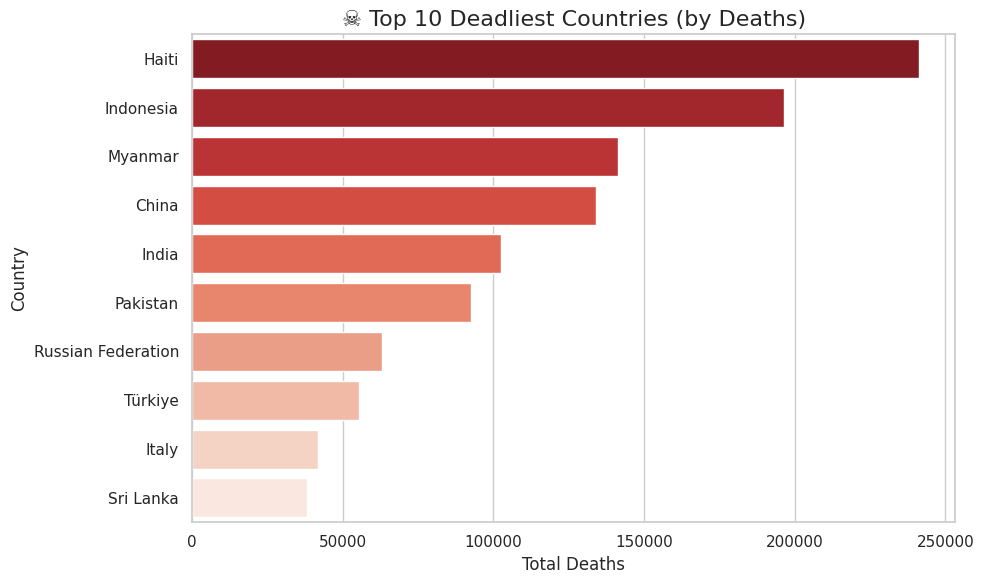

In [ ]:
# Sum total deaths per country
deadliest = df.groupby('Country')['Total Deaths'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=deadliest.values, y=deadliest.index, palette='Reds_r')
plt.title('☠️ Top 10 Deadliest Countries (by Deaths)', fontsize=16)
plt.xlabel('Total Deaths')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


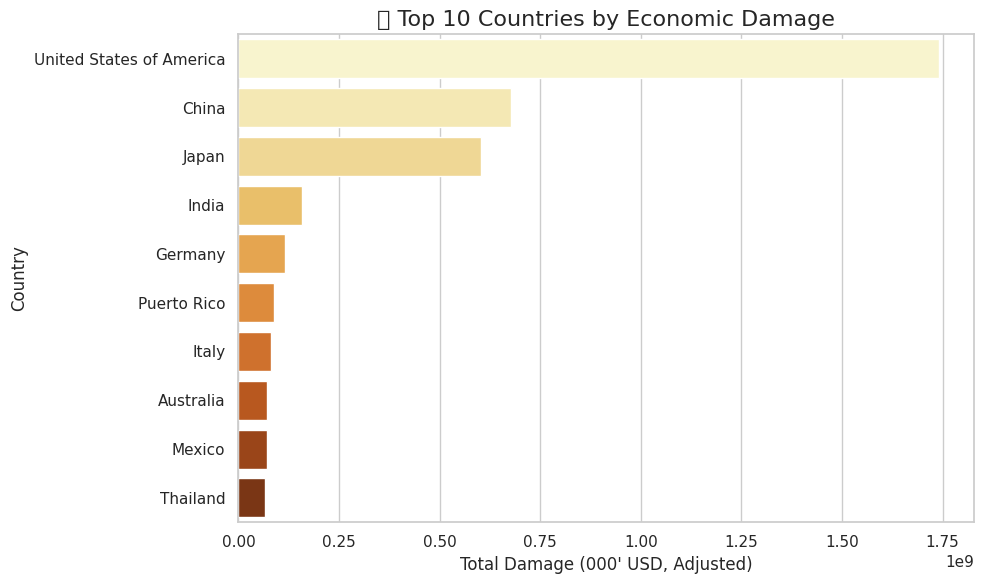

In [ ]:
# Sum of adjusted damage per country
top_damage = df.groupby('Country')["Total Damage, Adjusted ('000 US$)"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_damage.values, y=top_damage.index, palette='YlOrBr')
plt.title('💰 Top 10 Countries by Economic Damage', fontsize=16)
plt.xlabel("Total Damage (000' USD, Adjusted)")
plt.ylabel('Country')
plt.tight_layout()
plt.show()


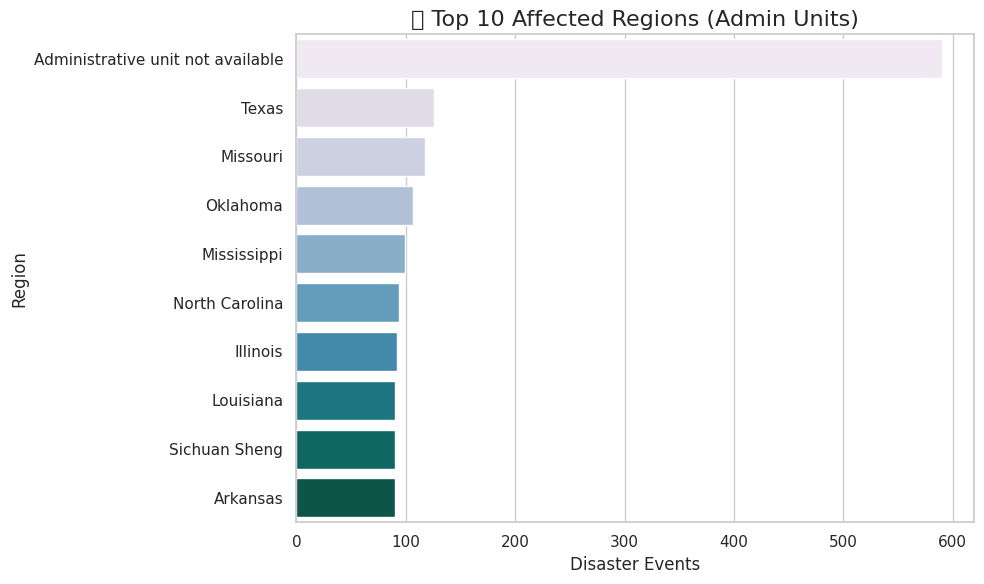

In [ ]:
# Count how often each region appears
admin_flat = df['Admin_Names'].dropna().explode()
top_regions = admin_flat.value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_regions.values, y=top_regions.index, palette='PuBuGn')
plt.title('🏞️ Top 10 Affected Regions (Admin Units)', fontsize=16)
plt.xlabel('Disaster Events')
plt.ylabel('Region')
plt.tight_layout()
plt.show()


In [ ]:
print(df.columns.tolist())



['DisNo.', 'Historic', 'Classification Key', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region', 'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal', 'Declaration', "AID Contribution ('000 US$)", 'Magnitude', 'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day', 'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless', 'Total Affected', "Reconstruction Costs ('000 US$)", "Reconstruction Costs, Adjusted ('000 US$)", "Insured Damage ('000 US$)", "Insured Damage, Adjusted ('000 US$)", "Total Damage ('000 US$)", "Total Damage, Adjusted ('000 US$)", 'CPI', 'Admin Units', 'Entry Date', 'Last Update', 'Start_Date', 'End_Date', 'Disaster_Duration', 'Admin_Names', 'Has_Missing_Data', 'Start_Year', 'Start_Month']


In [ ]:
import numpy as np

# Safely create the column
df['Damage_Per_Death'] = df["Total Damage, Adjusted ('000 US$)"] / df['Total Deaths']
df['Damage_Per_Death'].replace([np.inf, -np.inf], np.nan, inplace=True)


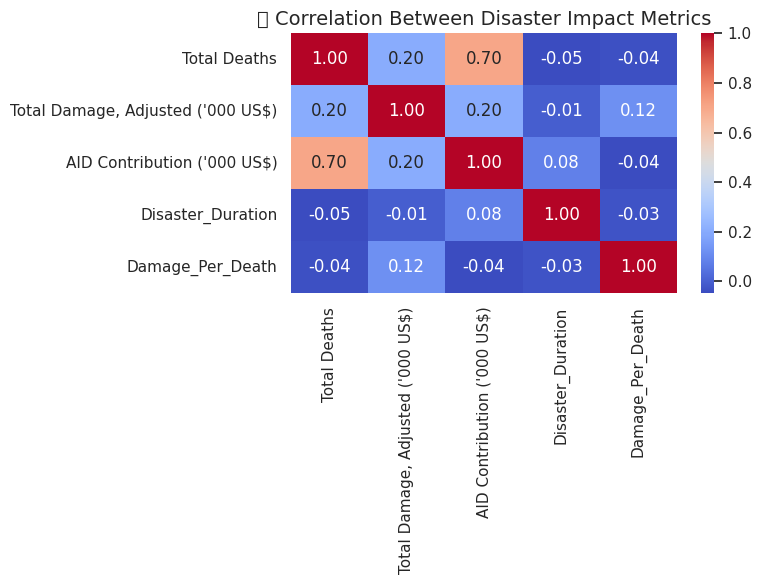

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define only the columns that exist
corr_features = [
    'Total Deaths',
    "Total Damage, Adjusted ('000 US$)",
    "AID Contribution ('000 US$)",    # Corrected column name
    'Disaster_Duration',
    'Damage_Per_Death'
]

# Drop rows with missing values in those columns
corr_df = df[corr_features].dropna()

# Compute and plot the correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('📌 Correlation Between Disaster Impact Metrics', fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd


In [ ]:
# Drop rows with missing critical values
model_df = df[[
    'Disaster Type', 'Region', 'Disaster_Duration',
    'Total Deaths', "Total Damage, Adjusted ('000 US$)"
]].dropna()

# Features and target
X = model_df[['Disaster Type', 'Region', 'Disaster_Duration']]
y = model_df["Total Damage, Adjusted ('000 US$)"]  # Change to 'Total Deaths' to switch targets


In [ ]:
# One-hot encode categorical features
X_encoded = pd.get_dummies(X, columns=['Disaster Type', 'Region'], drop_first=True)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)


In [ ]:
# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
# Calculate RMSE by taking the square root of the mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"📉 RMSE: {rmse:,.0f}")
print(f"📈 R² Score: {r2:.2f}")

📉 RMSE: 9,299,046
📈 R² Score: -0.25


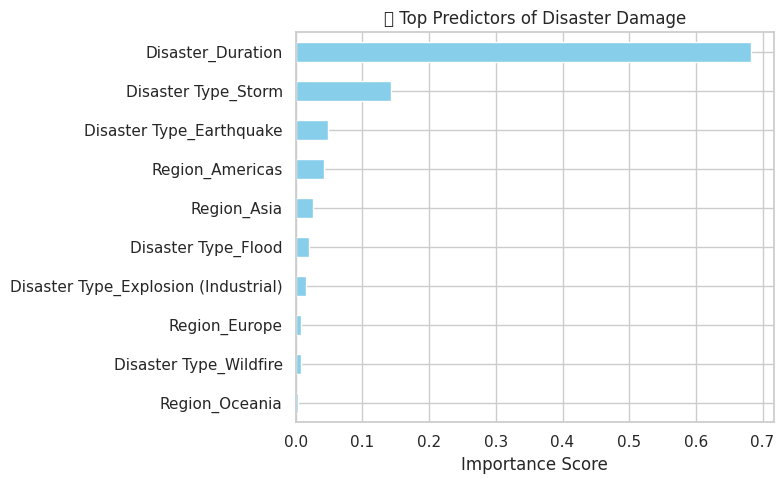

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh', figsize=(8,5), color='skyblue')
plt.title('🧠 Top Predictors of Disaster Damage')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


In [ ]:
# Setup
model_df = df[[
    'Disaster Type', 'Region', 'Disaster_Duration',
    'Total Deaths'
]].dropna()

X = model_df[['Disaster Type', 'Region', 'Disaster_Duration']]
y = model_df['Total Deaths']

# One-hot encode
X_encoded = pd.get_dummies(X, columns=['Disaster Type', 'Region'], drop_first=True)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Train
death_model = RandomForestRegressor(n_estimators=100, random_state=42)
death_model.fit(X_train, y_train)

# Predict
y_pred = death_model.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"📉 RMSE (Deaths): {rmse:,.2f}")
print(f"📈 R² Score (Deaths): {r2:.2f}")

📉 RMSE (Deaths): 2,175.67
📈 R² Score (Deaths): -0.03


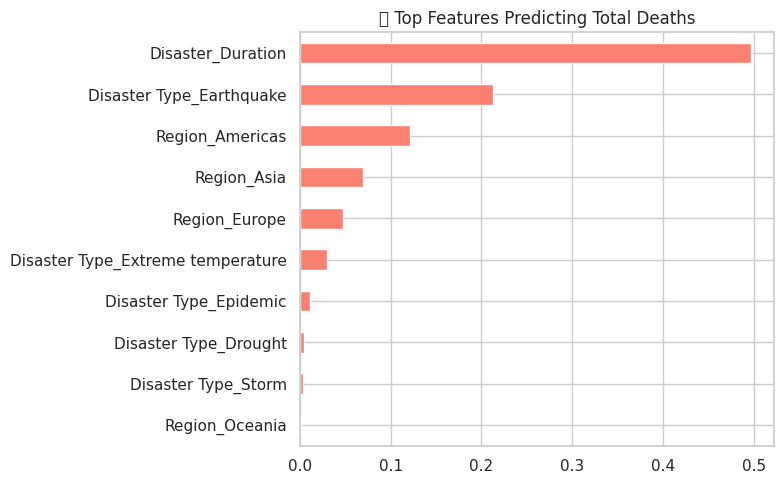

In [ ]:
feat_imp = pd.Series(death_model.feature_importances_, index=X_train.columns)
feat_imp.nlargest(10).sort_values().plot(kind='barh', figsize=(8,5), color='salmon')
plt.title('🔍 Top Features Predicting Total Deaths')
plt.tight_layout()
plt.show()


In [ ]:
# Set 10 million threshold
df['High_Damage'] = df["Total Damage, Adjusted ('000 US$)"] > 10000  # $10M in thousands

# Check balance
print(df['High_Damage'].value_counts())


High_Damage
False    13226
True      2558
Name: count, dtype: int64


In [ ]:
# Drop rows with missing values
class_df = df[[
    'Disaster Type', 'Region', 'Disaster_Duration', 'High_Damage'
]].dropna()

X = class_df[['Disaster Type', 'Region', 'Disaster_Duration']]
y = class_df['High_Damage'].astype(int)  # must be 0/1 for classification

# One-hot encode
X_encoded = pd.get_dummies(X, columns=['Disaster Type', 'Region'], drop_first=True)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[2519   91]
 [ 401  127]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2610
           1       0.58      0.24      0.34       528

    accuracy                           0.84      3138
   macro avg       0.72      0.60      0.63      3138
weighted avg       0.82      0.84      0.82      3138



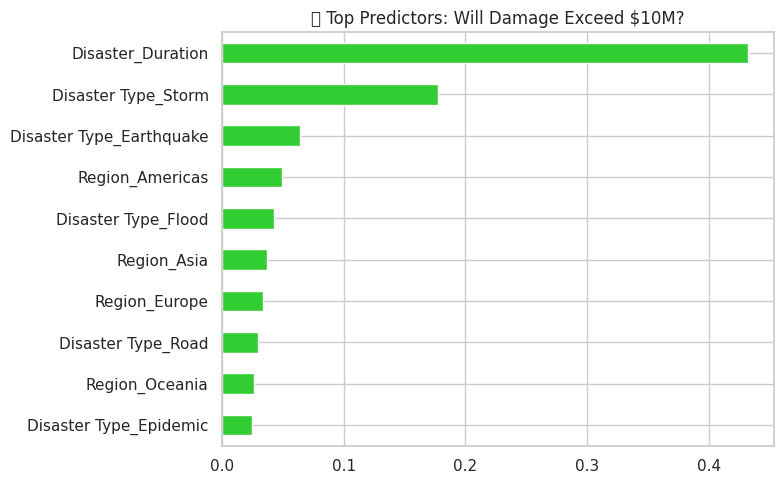

In [ ]:
feat_imp_class = pd.Series(clf.feature_importances_, index=X_train.columns)
feat_imp_class.nlargest(10).sort_values().plot(kind='barh', figsize=(8,5), color='limegreen')
plt.title('📊 Top Predictors: Will Damage Exceed $10M?')
plt.tight_layout()
plt.show()


In [ ]:
!pip install plotly --quiet
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
fig = px.treemap(df,
                 path=['Disaster Group', 'Disaster Type'],
                 title='🧩 Distribution of Disaster Types',
                 color_discrete_sequence=px.colors.qualitative.Safe)
fig.show()


In [ ]:
import plotly.express as px
from google.colab import files

# Create the treemap
fig = px.treemap(df,
                 path=['Disaster Group', 'Disaster Type'],
                 title='🧩 Distribution of Disaster Types',
                 color_discrete_sequence=px.colors.qualitative.Safe)

# Save it to an HTML file
fig.write_html("disaster_treemap.html")

# Download the HTML file to your computer
files.download("disaster_treemap.html")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
fig = px.pie(df,
             names='Disaster Type',
             title='🌍 Proportion of Disaster Types')
fig.show()


In [ ]:
import plotly.express as px
from google.colab import files

# Create the interactive pie chart
fig = px.pie(df,
             names='Disaster Type',
             title='🌍 Proportion of Disaster Types')

# Save as HTML file
fig.write_html("disaster_pie_chart.html")

# Download the HTML file
files.download("disaster_pie_chart.html")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

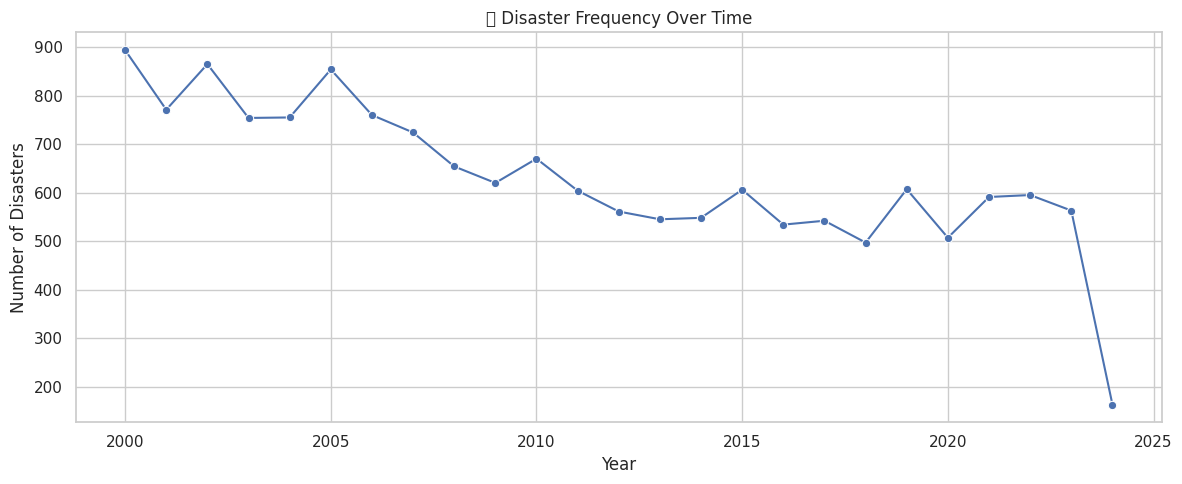

In [ ]:
# Create a year column if needed
df['Start_Year'] = df['Start_Date'].dt.year

# Count disasters per year
yearly = df['Start_Year'].value_counts().sort_index()

plt.figure(figsize=(12,5))
sns.lineplot(x=yearly.index, y=yearly.values, marker='o')
plt.title('📆 Disaster Frequency Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Drop rows with NaN in the column used for size
plot_df = df.dropna(subset=["Total Damage, Adjusted ('000 US$)"])

fig = px.scatter_geo(plot_df,
    lat='Latitude',
    lon='Longitude',
    hover_name='Disaster Type',
    size="Total Damage, Adjusted ('000 US$)",
    color='Disaster Type',
    projection="natural earth",
    title="🌐 Global Map of Disasters by Damage Cost"
)
fig.show()

In [ ]:
import plotly.express as px
from google.colab import files

# Drop rows with NaNs in the size column
plot_df = df.dropna(subset=["Total Damage, Adjusted ('000 US$)"])

# Create the interactive Geo Scatter Plot
fig = px.scatter_geo(
    plot_df,
    lat='Latitude',
    lon='Longitude',
    hover_name='Disaster Type',
    size="Total Damage, Adjusted ('000 US$)",
    color='Disaster Type',
    projection="natural earth",
    title="🌐 Global Map of Disasters by Damage Cost"
)

# Save the interactive map as an HTML file
fig.write_html("global_disasters_map.html")

# Trigger download
files.download("global_disasters_map.html")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Drop rows with NaN in the 'Disaster_Duration' column for plotting
plot_df = df.dropna(subset=['Disaster_Duration'])

fig = px.scatter(plot_df,
    x='Total Deaths',
    y="Total Damage, Adjusted ('000 US$)",
    color='Disaster Type',
    size='Disaster_Duration',
    hover_name='Region',
    title='💥 Damage vs. Deaths (Bubble Size = Duration)'
)
fig.show()

In [ ]:
import plotly.express as px
from google.colab import files

# Drop rows with NaN or negative Disaster_Duration
plot_df = df.dropna(subset=['Disaster_Duration', 'Total Deaths', "Total Damage, Adjusted ('000 US$)"])
plot_df = plot_df[plot_df['Disaster_Duration'] > 0]

# Create interactive scatter plot
fig = px.scatter(
    plot_df,
    x='Total Deaths',
    y="Total Damage, Adjusted ('000 US$)",
    color='Disaster Type',
    size='Disaster_Duration',
    hover_name='Region',
    title='💥 Damage vs. Deaths (Bubble Size = Duration)'
)

# Save and download as HTML
fig.write_html("damage_vs_deaths_bubble.html")
files.download("damage_vs_deaths_bubble.html")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Filter rows with valid aid & damage data
aid_df = df[[
    'Disaster Type',
    "AID Contribution ('000 US$)",
    "Total Damage, Adjusted ('000 US$)"
]].dropna()

aid_avg = aid_df.groupby('Disaster Type').mean().reset_index()

fig = px.bar(aid_avg,
             x='Disaster Type',
             y=["AID Contribution ('000 US$)", "Total Damage, Adjusted ('000 US$)"],
             barmode='group',
             title='🆘 Average Aid vs Damage by Disaster Type')
fig.show()


In [ ]:
import plotly.express as px
from google.colab import files

# Filter rows with valid aid & damage data
aid_df = df[[
    'Disaster Type',
    "AID Contribution ('000 US$)",
    "Total Damage, Adjusted ('000 US$)"
]].dropna()

# Compute average aid and damage per disaster type
aid_avg = aid_df.groupby('Disaster Type').mean(numeric_only=True).reset_index()

# Create grouped bar chart
fig = px.bar(
    aid_avg,
    x='Disaster Type',
    y=["AID Contribution ('000 US$)", "Total Damage, Adjusted ('000 US$)"],
    barmode='group',
    title='🆘 Average Aid vs Damage by Disaster Type'
)

# Show interactive chart
fig.show()

# Save as interactive HTML and offer download
fig.write_html("aid_vs_damage_bar.html")
files.download("aid_vs_damage_bar.html")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

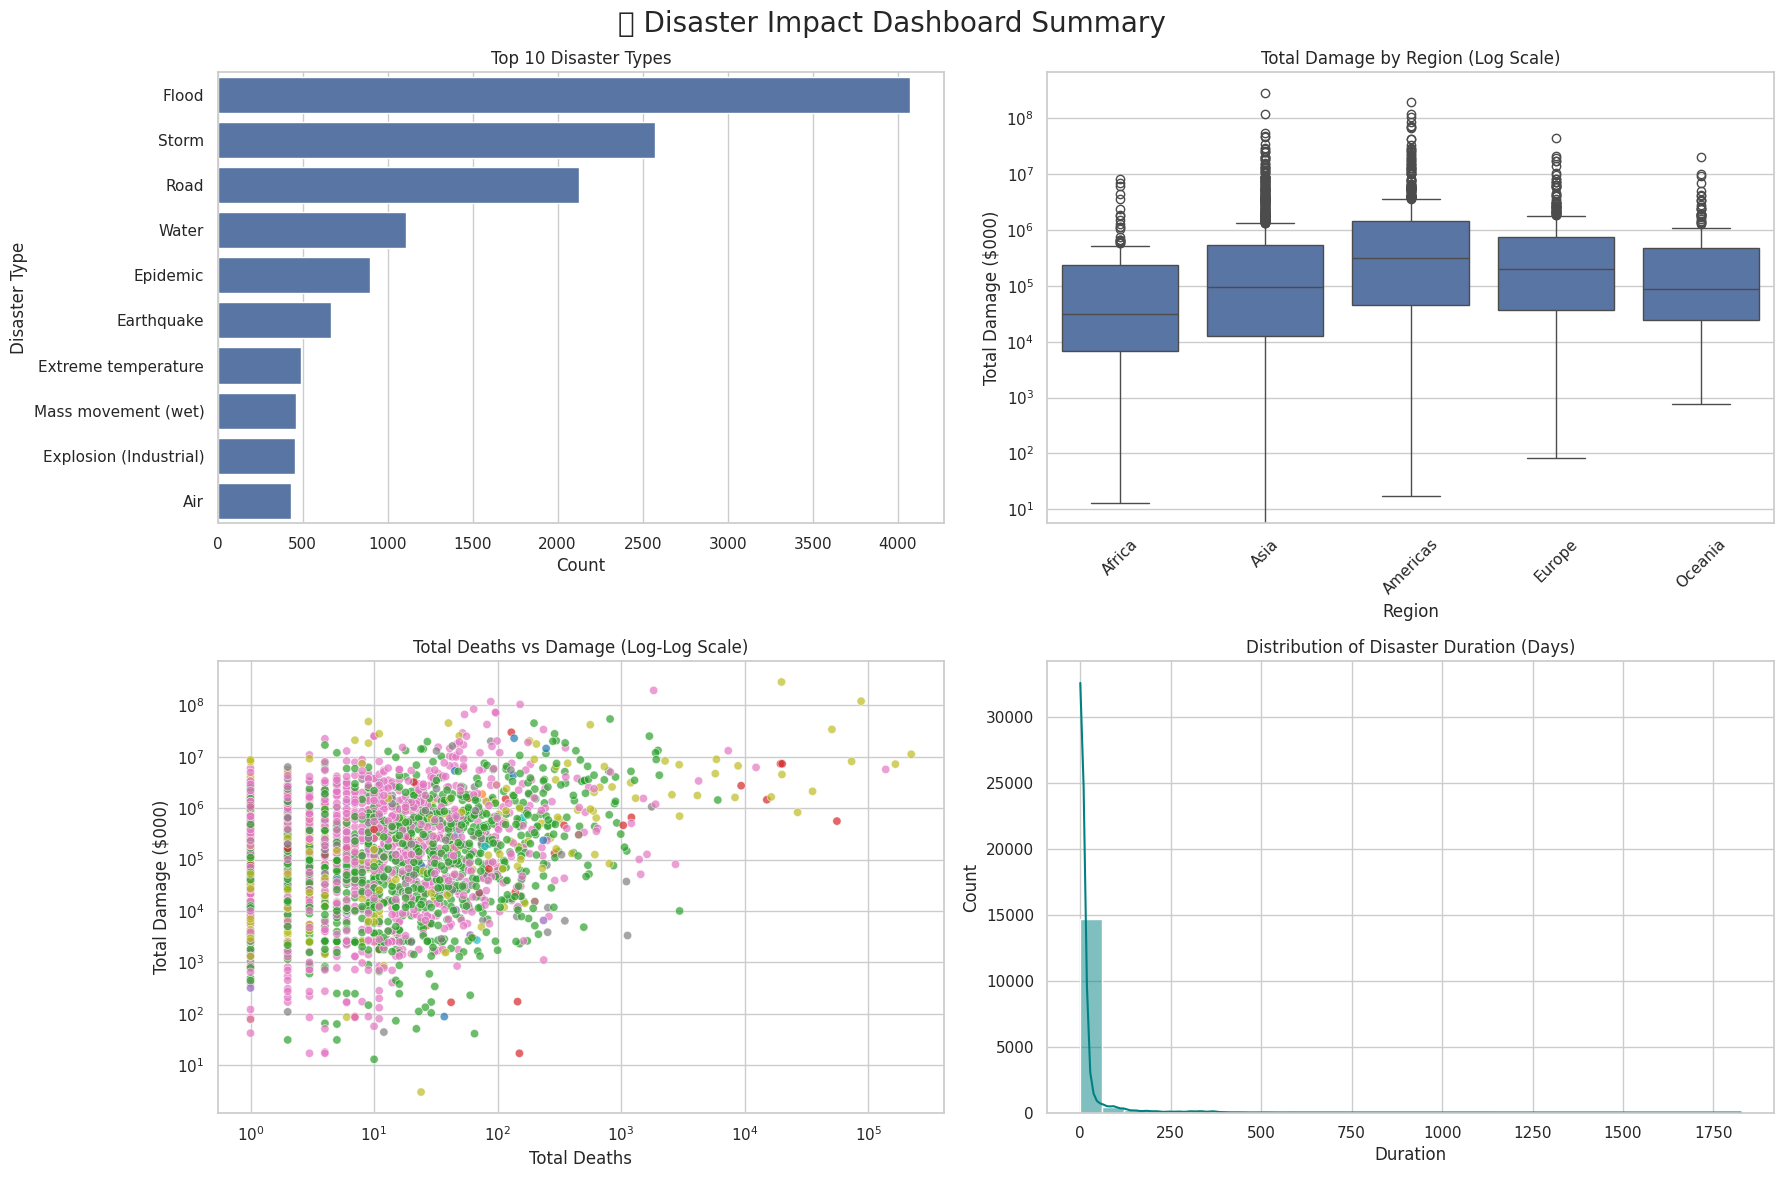

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

# Create figure with GridSpec layout
fig = plt.figure(constrained_layout=True, figsize=(18, 12))
gs = gridspec.GridSpec(2, 2, figure=fig)

# Plot 1: Disaster Type Count
ax1 = fig.add_subplot(gs[0, 0])
sns.countplot(y='Disaster Type', data=df, order=df['Disaster Type'].value_counts().index[:10], ax=ax1)
ax1.set_title('Top 10 Disaster Types')
ax1.set_xlabel('Count')
ax1.set_ylabel('Disaster Type')

# Plot 2: Damage by Region (log scale)
ax2 = fig.add_subplot(gs[0, 1])
sns.boxplot(
    x='Region',
    y="Total Damage, Adjusted ('000 US$)",
    data=df,
    ax=ax2
)
ax2.set_yscale('log')
ax2.set_title('Total Damage by Region (Log Scale)')
ax2.set_xlabel('Region')
ax2.set_ylabel('Total Damage ($000)')
ax2.tick_params(axis='x', rotation=45)

# Plot 3: Deaths vs Damage Scatter
ax3 = fig.add_subplot(gs[1, 0])
sns.scatterplot(
    x='Total Deaths',
    y="Total Damage, Adjusted ('000 US$)",
    hue='Disaster Type',
    data=df,
    ax=ax3,
    alpha=0.7,
    palette='tab10',
    legend=False
)
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_title('Total Deaths vs Damage (Log-Log Scale)')
ax3.set_xlabel('Total Deaths')
ax3.set_ylabel('Total Damage ($000)')

# Plot 4: Disaster Duration Distribution
ax4 = fig.add_subplot(gs[1, 1])
sns.histplot(df['Disaster_Duration'], bins=30, kde=True, color='teal', ax=ax4)
ax4.set_title('Distribution of Disaster Duration (Days)')
ax4.set_xlabel('Duration')
ax4.set_ylabel('Count')

plt.suptitle('🌍 Disaster Impact Dashboard Summary', fontsize=20)
plt.tight_layout()
plt.show()



In [ ]:
# Save as PNG (must run before plt.show())
fig.savefig("disaster_dashboard.png", dpi=300, bbox_inches='tight')

# Download the file in Colab
from google.colab import files
files.download("disaster_dashboard.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.1 MB/s eta 0:00:00


In [ ]:
from IPython.display import display
import ipywidgets as widgets


In [ ]:
# Rename columns to avoid space issues
df.rename(columns=lambda x: x.strip(), inplace=True)

# Rename columns to make date parsing easier
df.rename(columns={
    'Start Year': 'Start_Year',
    'Start Month': 'Start_Month',
    'Start Day': 'Start_Day',
    'End Year': 'End_Year',
    'End Month': 'End_Month',
    'End Day': 'End_Day'
}, inplace=True)

# Fill missing day values with 1 for parsing
df['Start_Day'] = df['Start_Day'].fillna(1).astype(int)
df['End_Day'] = df['End_Day'].fillna(1).astype(int)

# Create Start and End Dates safely
df['Start_Date'] = pd.to_datetime(df[['Start_Year', 'Start_Month', 'Start_Day']].rename(columns={'Start_Year': 'year', 'Start_Month': 'month', 'Start_Day': 'day'}), errors='coerce')
df['End_Date'] = pd.to_datetime(df[['End_Year', 'End_Month', 'End_Day']].rename(columns={'End_Year': 'year', 'End_Month': 'month', 'End_Day': 'day'}), errors='coerce')

# Calculate Disaster Duration
df['Disaster_Duration'] = (df['End_Date'] - df['Start_Date']).dt.days

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets as widgets

# Load your cleaned DataFrame (you can change this path if needed)
# Assuming 'df' is already loaded and cleaned from previous steps.
# If you are running this cell independently, you might need to load and clean 'df' first.

# --------- Widgets for interactivity ----------
region_selector = widgets.SelectMultiple(
    options=df['Region'].dropna().unique(),
    value=[],
    description='Region:',
    layout=widgets.Layout(width='300px')
)

type_selector = widgets.SelectMultiple(
    options=df['Disaster Type'].dropna().unique(),
    value=[],
    description='Type:',
    layout=widgets.Layout(width='300px')
)

def filter_df(region_vals, type_vals):
    filtered = df.copy()
    if region_vals:
        filtered = filtered[filtered['Region'].isin(region_vals)]
    if type_vals:
        filtered = filtered[filtered['Disaster Type'].isin(type_vals)]
    return filtered

# --------- Plotting Function --------------
def plot_dashboard(region_vals, type_vals):
    filtered_df = filter_df(region_vals, type_vals)

    plt.figure(figsize=(20, 16))

    # 1. Top Disaster Types
    plt.subplot(2, 2, 1)
    if not filtered_df.empty:
        top_types = filtered_df['Disaster Type'].value_counts().nlargest(10)
        sns.barplot(x=top_types.values, y=top_types.index, palette="magma")
        plt.title("Top 10 Disaster Types")
        plt.xlabel("Number of Events")
        plt.ylabel("Disaster Type")
    else:
        plt.text(0.5, 0.5, "No data for selection", ha='center', va='center')
        plt.axis('off')


    # 2. Damage by Region
    plt.subplot(2, 2, 2)
    # Check if 'Total Damage, Adjusted ('000 US$)' exists and is not all NaN in filtered_df
    if "Total Damage, Adjusted ('000 US$)" in filtered_df.columns and not filtered_df["Total Damage, Adjusted ('000 US$)"].dropna().empty:
        sns.boxplot(
            x='Region',
            y="Total Damage, Adjusted ('000 US$)",
            data=filtered_df,
            showfliers=False
        )
        plt.yscale("log")
        plt.xticks(rotation=45)
        plt.title("Damage by Region (log scale)")
    else:
        plt.text(0.5, 0.5, "No damage data for selection", ha='center', va='center')
        plt.axis('off')


    # 3. Deaths vs Damage (scatter)
    plt.subplot(2, 2, 3)
    # Check if necessary columns exist and have data for scatter plot
    scatter_cols = ['Total Deaths', "Total Damage, Adjusted ('000 US$)", 'Disaster Type']
    if all(col in filtered_df.columns for col in scatter_cols) and not filtered_df[scatter_cols].dropna().empty:
        sns.scatterplot(
            x='Total Deaths',
            y="Total Damage, Adjusted ('000 US$)",
            hue='Disaster Type',
            data=filtered_df,
            alpha=0.6,
            legend=False
        )
        plt.xscale("log")
        plt.yscale("log")
        plt.title("Deaths vs. Damage")
        plt.xlabel("Total Deaths (log)")
        plt.ylabel("Damage (log)")
    else:
        plt.text(0.5, 0.5, "No death or damage data for selection", ha='center', va='center')
        plt.axis('off')


    # 4. Duration Distribution
    plt.subplot(2, 2, 4)
    if 'Disaster_Duration' in filtered_df.columns and not filtered_df['Disaster_Duration'].dropna().empty:
        sns.histplot(filtered_df['Disaster_Duration'].dropna(), bins=30, kde=True, color='steelblue')
        plt.title("Disaster Duration Distribution (days)")
        plt.xlabel("Duration (Days)")
    else:
        plt.text(0.5, 0.5, "No duration data for selection", ha='center', va='center')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# --------- Interactive Widget UI ------------
interactive_plot = widgets.interactive_output(
    plot_dashboard,
    {'region_vals': region_selector, 'type_vals': type_selector}
)

dashboard_box = widgets.HBox([region_selector, type_selector])
display(dashboard_box, interactive_plot)

Output()